In [1]:
from keras.datasets import mnist
import seaborn as sns
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

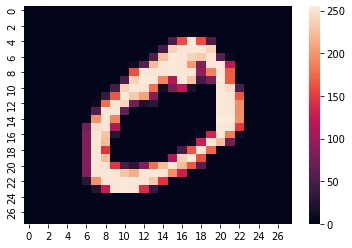

(28, 28)

In [2]:
sns.heatmap(train_data[1, :, :])
plt.show()
train_data[1,:,:].shape

In [3]:
train_data = train_data.reshape((60000, 28*28))
test_data = test_data.reshape((10000, 28*28))
num_classes = 10
train_labels = to_categorical(train_labels,num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
train_labels.shape

(60000, 10)

In [4]:
train_data.shape

(60000, 784)

In [5]:
train_data = train_data /255
test_data = test_data /255

In [70]:
from keras import Sequential, Input, layers
import tensorflow as tf
model = Sequential([
    Input(shape = (784,)),
    layers.Dense(32, activation = "relu", name="HiddenLayer_1"),
    layers.Dense(32, activation = "relu", name="HiddenLayer_2"),
    layers.Dense(10, activation = "softmax", name="OutputLayer"),
], name="MNISTClassification")
model.summary()

Model: "MNISTClassification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 32)                25120     
                                                                 
 HiddenLayer_2 (Dense)       (None, 32)                1056      
                                                                 
 OutputLayer (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [65]:
import numpy as np
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss = CategoricalCrossentropy(),
    metrics = ["acc"]
)

history =model.fit(train_data.astype(np.float32), train_labels, batch_size=64, epochs=8, validation_split=0.1)

Epoch 1/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0112 - acc: 0.9976 - val_loss: 0.1769 - val_acc: 0.9730
Epoch 2/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0109 - acc: 0.9975 - val_loss: 0.1771 - val_acc: 0.9730
Epoch 3/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0109 - acc: 0.9976 - val_loss: 0.1760 - val_acc: 0.9728
Epoch 4/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0107 - acc: 0.9977 - val_loss: 0.1782 - val_acc: 0.9722
Epoch 5/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0106 - acc: 0.9976 - val_loss: 0.1793 - val_acc: 0.9722
Epoch 6/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0105 - acc: 0.9977 - val_loss: 0.1784 - val_acc: 0.9723
Epoch 7/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0105 - acc: 0.9976 - val_loss: 0.1805 - val_acc: 0.9725
Epoch 8/8
844/844 [==============================] - 2s 2ms/step - loss: 0.0102 - a

In [66]:
history_dict = history.history
history_dict.keys()
history_dict

{'loss': [0.0112061882391572,
  0.010913645848631859,
  0.010892531834542751,
  0.01070780772715807,
  0.010610890574753284,
  0.010485662147402763,
  0.01045792456716299,
  0.010227393358945847],
 'acc': [0.9975740909576416,
  0.9975185394287109,
  0.9976111054420471,
  0.9977037310600281,
  0.9976481199264526,
  0.9976851940155029,
  0.9975555539131165,
  0.9977962970733643],
 'val_loss': [0.1768607199192047,
  0.17712369561195374,
  0.17600741982460022,
  0.17816147208213806,
  0.17928531765937805,
  0.17838488519191742,
  0.18048328161239624,
  0.17996737360954285],
 'val_acc': [0.9729999899864197,
  0.9729999899864197,
  0.9728333353996277,
  0.9721666574478149,
  0.9721666574478149,
  0.9723333120346069,
  0.9725000262260437,
  0.971833348274231]}

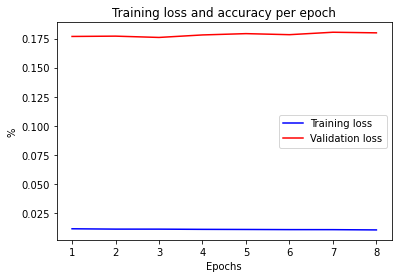

In [67]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
acc_values = history_dict["acc"]
val_loss = history_dict["val_loss"]

epochs = range(1,len(loss_values)+ 1)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training loss and accuracy per epoch")
plt.xlabel("Epochs")
plt.ylabel("%")
plt.legend()
plt.show()

    It is a clear sign of overfitting, when te training error goes down, but the testing error increases.

In [1]:
from random import randint
value = randint(0, 200)
for i in range(value,value+8):
    test_img = test_data[i,:].reshape(28,28)
    #sns.heatmap(test_img)
    plt.imshow(test_img)
    test_img = test_img.reshape(1,784)
    pred = model.predict(test_img)
    print("Predicted truth: " + str(np.argmax(pred, axis=1)[0])+  " with a accuracy of: " + str(pred[0][np.argmax(pred)]*100) + "%")
    print("Ground truth: ", np.argmax(test_labels[i]))
    plt.show()


NameError: name 'test_data' is not defined